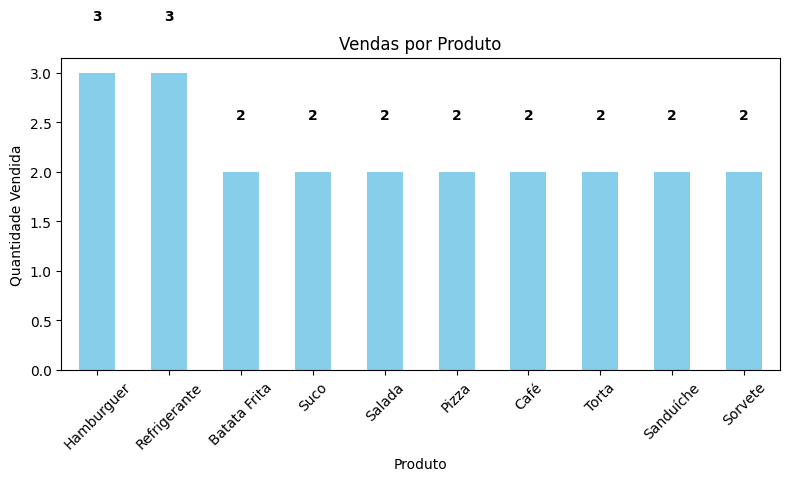

In [8]:
# Gráfico de vendas por produto
# Este gráfico mostra a quantidade total vendida de cada produto, permitindo identificar os itens mais populares.
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

vendas = pd.read_csv('../dados/vendas.csv')
quantidades = vendas['produto'].value_counts()
plt.figure(figsize=(8,5))
ax = quantidades.plot(kind='bar', color='skyblue')
plt.title('Vendas por Produto')
plt.xlabel('Produto')
plt.ylabel('Quantidade Vendida')
plt.xticks(rotation=45)
for i, v in enumerate(quantidades.values):
    ax.text(i, v + 0.5, str(v), ha='center', va='bottom', fontweight='bold')
plt.tight_layout()
plt.show()

# Gráfico de participação de cada produto nas vendas
Este gráfico de pizza mostra a proporção de vendas de cada produto, facilitando a visualização da participação de cada item no total vendido.

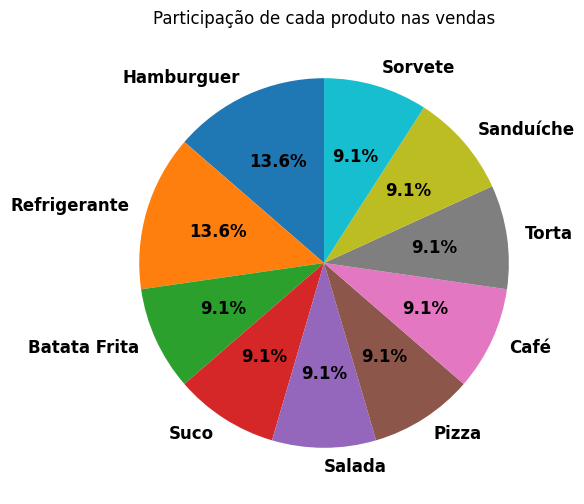

In [9]:
# Gráfico de pizza da participação de cada produto nas vendas
# Mostra a proporção de vendas de cada produto no total vendido.
quantidades = vendas['produto'].value_counts()
plt.figure(figsize=(6,6))
plt.pie(quantidades, labels=quantidades.index, autopct='%1.1f%%', startangle=90, textprops={'fontsize': 12, 'fontweight': 'bold'})
plt.title('Participação de cada produto nas vendas')
plt.show()

# Gráfico de faturamento por produto
Este gráfico mostra o total faturado por cada produto, permitindo identificar os itens que geram mais receita para o negócio.

C:\Users\miria\AppData\Local\Temp\ipykernel_3748\2322628258.py:2: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  faturamento_produto = vendas.groupby('produto').apply(lambda x: (x['quantidade']*x['preco_unitario']).sum())
C:\Users\miria\AppData\Local\Temp\ipykernel_3748\2322628258.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=faturamento_produto.index, y=faturamento_produto.values, palette='viridis')


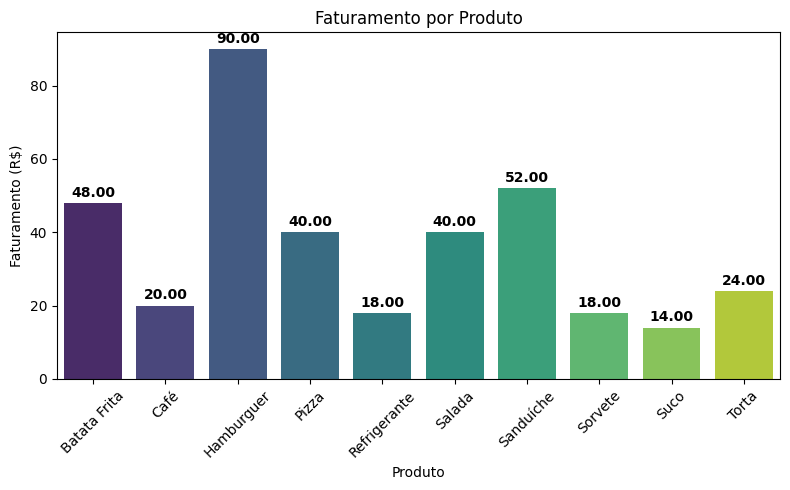

In [10]:
# Gráfico de faturamento por produto
faturamento_produto = vendas.groupby('produto').apply(lambda x: (x['quantidade']*x['preco_unitario']).sum())
plt.figure(figsize=(8,5))
ax = sns.barplot(x=faturamento_produto.index, y=faturamento_produto.values, palette='viridis')
plt.title('Faturamento por Produto')
plt.xlabel('Produto')
plt.ylabel('Faturamento (R$)')
plt.xticks(rotation=45)
for i, v in enumerate(faturamento_produto.values):
    ax.text(i, v + max(faturamento_produto.values)*0.01, f'{v:.2f}', ha='center', va='bottom', fontweight='bold')
plt.tight_layout()
plt.show()

# Gráfico de evolução das vendas mensais
Este gráfico mostra como as vendas evoluíram ao longo dos meses, permitindo identificar tendências, sazonalidades e períodos de pico.

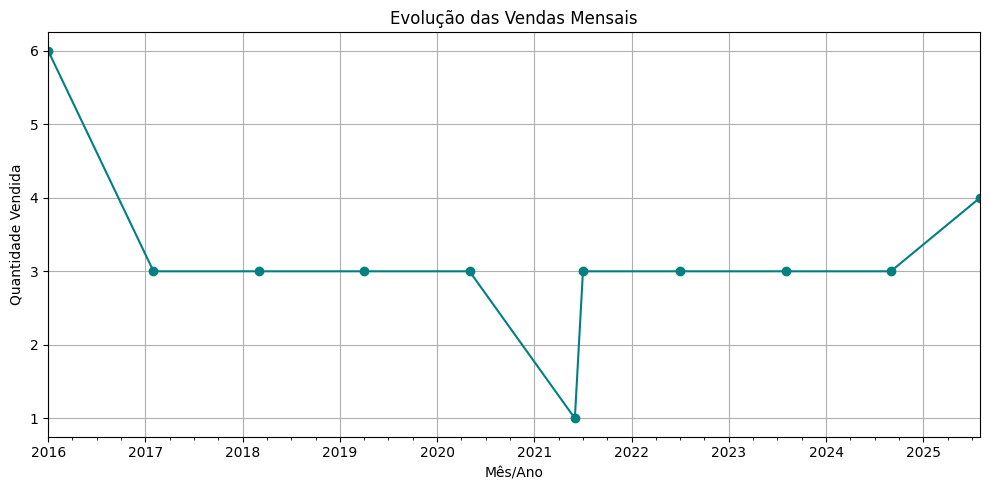

In [11]:
# Gráfico de evolução das vendas mensais
vendas['data'] = pd.to_datetime(vendas['data'])
vendas_por_mes = vendas.groupby(vendas['data'].dt.to_period('M')).quantidade.sum()
plt.figure(figsize=(10,5))
ax = vendas_por_mes.plot(kind='line', marker='o', color='teal')
plt.title('Evolução das Vendas Mensais')
plt.xlabel('Mês/Ano')
plt.ylabel('Quantidade Vendida')
plt.grid(True)
for i, v in enumerate(vendas_por_mes.values):
    ax.annotate(str(v), (i, v), textcoords="offset points", xytext=(0,8), ha='center', fontweight='bold')
plt.tight_layout()
plt.show()

## Análise Avançada: DEA e Correlação
Nesta seção, vamos explorar técnicas avançadas para avaliar eficiência e relações entre variáveis usando DEA e correlação.

In [12]:
# Exemplo de Análise DEA (Data Envelopment Analysis)
# Para fins didáticos, vamos simular uma análise de eficiência entre lojas/cidades usando vendas e despesas.

from sklearn.preprocessing import MinMaxScaler
import numpy as np

# Supondo que vendas.csv tenha coluna 'cidade', 'quantidade' e despesas.csv tenha 'cidade', 'valor'
despesas = pd.read_csv('../dados/despesas.csv')
if 'cidade' in vendas.columns:
    # Agrupar vendas e despesas por cidade
    vendas_por_cidade = vendas.groupby('cidade')['quantidade'].sum()
    despesas_por_cidade = despesas.groupby('cidade')['valor'].sum()
    df_dea = pd.DataFrame({'vendas': vendas_por_cidade, 'despesas': despesas_por_cidade})
    df_dea = df_dea.dropna()
    scaler = MinMaxScaler()
    df_dea_scaled = scaler.fit_transform(df_dea)
    eficiencia = df_dea_scaled[:,0] / (df_dea_scaled[:,1] + 1e-6)
    df_dea['eficiencia'] = eficiencia
    df_dea.sort_values('eficiencia', ascending=False).plot(kind='bar', y='eficiencia', color='green')
    plt.title('Eficiência Relativa por Cidade (DEA Simples)')
    plt.xlabel('Cidade')
    plt.ylabel('Eficiência')
    plt.xticks(rotation=45)
    plt.show()
else:
    print('Coluna cidade não encontrada em vendas.csv para análise DEA.')

# Correlação entre quantidade vendida e faturamento
if 'faturamento' in vendas.columns:
    correlacao = vendas[['quantidade', 'faturamento']].corr()
    print('Correlação entre quantidade vendida e faturamento:')
    print(correlacao)
    sns.heatmap(correlacao, annot=True, cmap='Blues')
    plt.title('Mapa de Correlação')
    plt.show()
else:
    print('Coluna faturamento não encontrada em vendas.csv para análise de correlação.')

Coluna cidade não encontrada em vendas.csv para análise DEA.
Coluna faturamento não encontrada em vendas.csv para análise de correlação.


## Comparativo: Despesas vs Receitas
Agora vamos comparar a evolução das despesas e receitas ao longo do tempo para avaliar a saúde financeira do negócio.

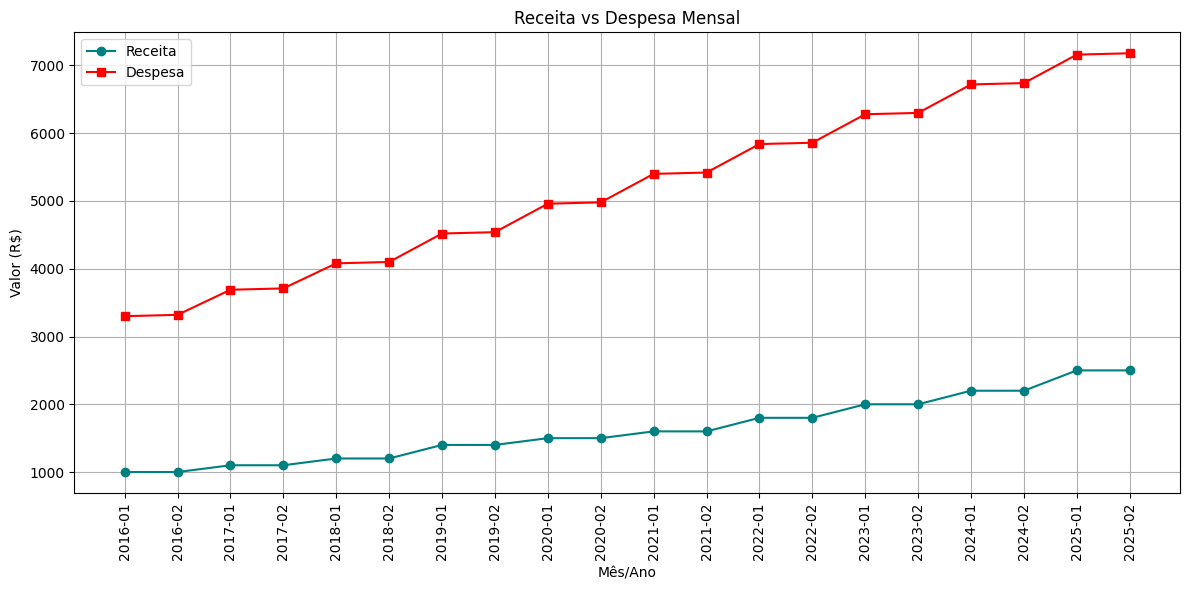

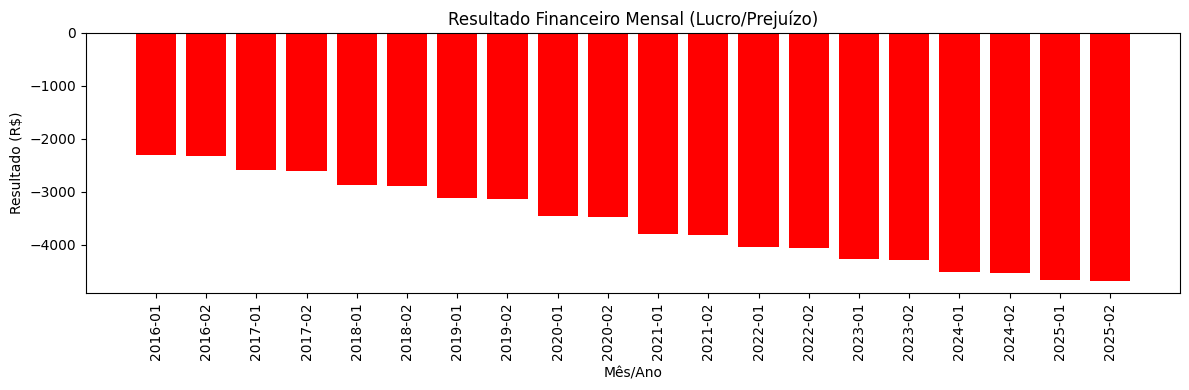

In [13]:
# Comparativo de Despesas vs Receitas ao longo do tempo
faturamento_mensal = pd.read_csv('../dados/faturamento_mensal.csv')
despesas = pd.read_csv('../dados/despesas.csv')

# Preparar dados mensais
faturamento_mensal['mes'] = faturamento_mensal['mes'].astype(str)
despesas['data'] = pd.to_datetime(despesas['data'])
despesas['ano_mes'] = despesas['data'].dt.strftime('%Y-%m')
despesas_mensal = despesas.groupby('ano_mes')['valor'].sum().reset_index()

# Unir receitas e despesas
comparativo = pd.DataFrame()
comparativo['mes'] = faturamento_mensal['ano'].astype(str) + '-' + faturamento_mensal['mes'].str.zfill(2)
comparativo['receita'] = faturamento_mensal['receita']
comparativo = comparativo.merge(despesas_mensal, left_on='mes', right_on='ano_mes', how='left')
comparativo = comparativo.fillna(0)
comparativo = comparativo.sort_values('mes')

plt.figure(figsize=(12,6))
plt.plot(comparativo['mes'], comparativo['receita'], label='Receita', marker='o', color='teal')
plt.plot(comparativo['mes'], comparativo['valor'], label='Despesa', marker='s', color='red')
plt.title('Receita vs Despesa Mensal')
plt.xlabel('Mês/Ano')
plt.ylabel('Valor (R$)')
plt.xticks(rotation=90)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Resultado financeiro mensal
comparativo['resultado'] = comparativo['receita'] - comparativo['valor']
plt.figure(figsize=(12,4))
plt.bar(comparativo['mes'], comparativo['resultado'], color=['green' if x>=0 else 'red' for x in comparativo['resultado']])
plt.title('Resultado Financeiro Mensal (Lucro/Prejuízo)')
plt.xlabel('Mês/Ano')
plt.ylabel('Resultado (R$)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()